# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Data set

In [0]:
data = pd.read_csv("/content/drive/My Drive/Untitled folder/assignment2_part1.csv", index_col='Unnamed: 0')
data.head(10)

,x,y
0,-15.0,-2156.994097
1,-14.5,-1956.523904
2,-14.0,-1778.151738
3,-13.5,-1610.924846
4,-13.0,-1456.176307
5,-12.5,-1302.029411
6,-12.0,-1170.000646
7,-11.5,-1044.071813
8,-11.0,-917.935911
9,-10.5,-811.861672


In [0]:
len(data)

80

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

## Split the data set into Training, Testing and Validation Set

In [0]:
train_data, test_data, validate_data = np.split(data.sample(frac = 1), [int(len(data)*0.8), int(len(data)*0.9)])

In [0]:
print("Length of Training Data : {}, Length of Test Data : {}, and Length of Validation Data : {}".format(len(train_data), len(test_data), len(validate_data)))

Length of Training Data : 64, Length of Test Data : 8, and Length of Validation Data : 8


### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

## Visualizing the Training Data Set

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

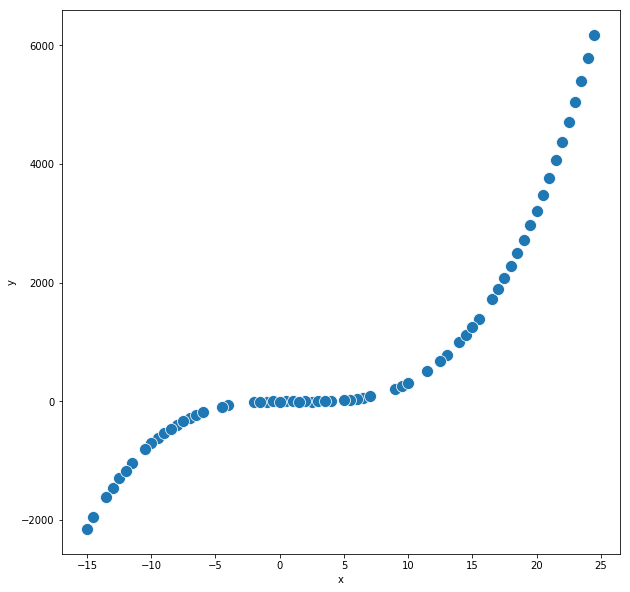

In [0]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_context(context = 'poster', font_scale = 0.9)
sns.set_style(style = 'whitegrid')
sns.scatterplot(x='x', y ='y', data = train_data, palette= 'spectral')
ax.set(xlabel='x', ylabel='y')


## Performing regression on Training data set

In [0]:
temp_data = train_data.copy()
lm = smf.ols(formula='y~x', data = temp_data).fit()
temp_data['Prediction'] = lm.predict()
temp_data.head()

,x,y,Prediction
48,9.0,209.339774,1394.112079
7,-11.5,-1044.071813,-1548.743770
11,-9.5,-620.731317,-1261.635882
22,-4.0,-72.930855,-472.089191
79,24.5,6176.093224,3619.198208


## R2 Score of the Training data set

In [0]:
print('R2 Score: ',r2_score(temp_data['y'],temp_data['Prediction']))

R2 Score:  0.7992932371221507


### Task 4: Visualize the regression fit

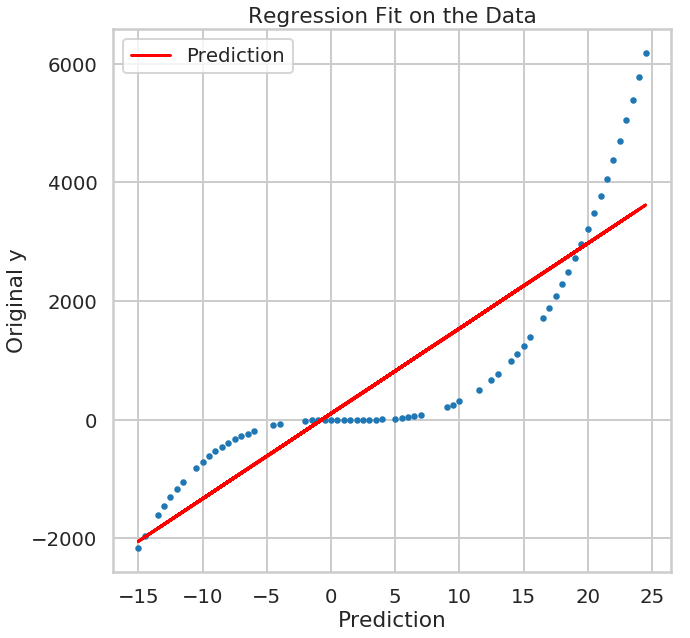

In [0]:
fig, ax = plt.subplots(figsize = (10,10)) 
temp_data.plot(ax=ax,kind='scatter',x='x',y='y', legend = True, title = 'Regression Fit on the Data') 
ax.plot(temp_data.x,temp_data.Prediction,'r-')
ax.set(xlabel='Prediction', ylabel='Original y')
ax.legend()

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

## Introducing a Square Root regressor variable

In [0]:
temp_data['Sq_2']=temp_data.x*np.sqrt(2)

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

## Regression fit to 'x' and 'Square root x'

In [0]:
lm = smf.ols(formula='y~x+Sq_2', data = temp_data).fit()
temp_data['2_regressor_prediction'] = lm.predict()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.69e-23
Time:                        18:15:58   Log-Likelihood:                -523.82
No. Observations:                  64   AIC:                             1052.
Df Residuals:                      62   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.1266    120.011      0.851      0.3

## Visualize the Regression fit

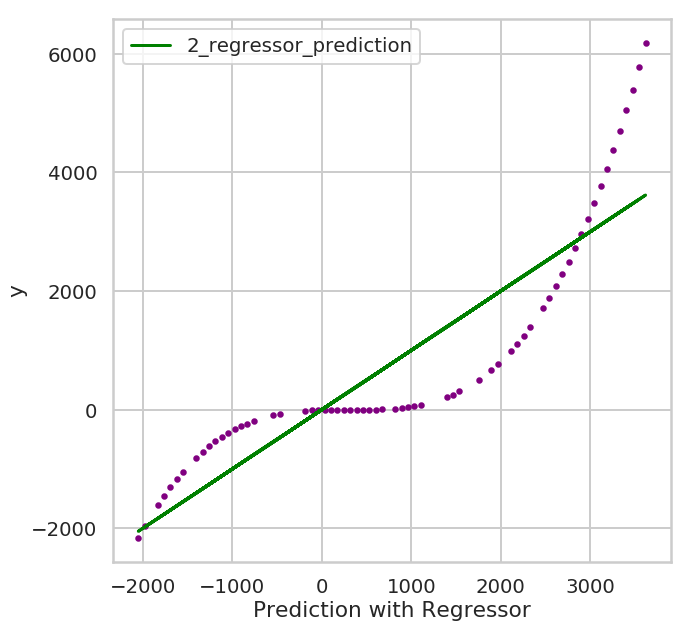

In [0]:
fig, ax = plt.subplots(figsize = (10,10)) 
temp_data.plot(ax=ax,kind='scatter',x='2_regressor_prediction',y='y', color = 'purple') 
ax.plot(temp_data['2_regressor_prediction'],temp_data['2_regressor_prediction'],'g-')
ax.set(xlabel = 'Prediction with Regressor', ylabel = 'y')
ax.legend()

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

## Putting 12 Regressors in Training Set 

In [0]:
M = 12
for p in range(1,M+1): 
    temp_data['x%d'%p]=temp_data.x**p
temp_data.head()

,x,y,Prediction,Sq_2,2_regressor_prediction,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
48,9.0,209.339774,1394.112079,12.727922,1394.112079,9.0,81.00,729.000,6561.0000,5.904900e+04,5.314410e+05,4.782969e+06,4.304672e+07,3.874205e+08,3.486784e+09,3.138106e+10,2.824295e+11
7,-11.5,-1044.071813,-1548.743770,-16.263456,-1548.743770,-11.5,132.25,-1520.875,17490.0625,-2.011357e+05,2.313061e+06,-2.660020e+07,3.059023e+08,-3.517876e+09,4.045558e+10,-4.652391e+11,5.350250e+12
11,-9.5,-620.731317,-1261.635882,-13.435029,-1261.635882,-9.5,90.25,-857.375,8145.0625,-7.737809e+04,7.350919e+05,-6.983373e+06,6.634204e+07,-6.302494e+08,5.987369e+09,-5.688001e+10,5.403601e+11
22,-4.0,-72.930855,-472.089191,-5.656854,-472.089191,-4.0,16.00,-64.000,256.0000,-1.024000e+03,4.096000e+03,-1.638400e+04,6.553600e+04,-2.621440e+05,1.048576e+06,-4.194304e+06,1.677722e+07
79,24.5,6176.093224,3619.198208,34.648232,3619.198208,24.5,600.25,14706.125,360300.0625,8.827352e+06,2.162701e+08,5.298618e+09,1.298161e+11,3.180495e+12,7.792214e+13,1.909092e+15,4.677276e+16


## Fitting the model with Training Set

In [0]:
R2 = []; Params = []
for M in range(1,M+1):
    lm = smf.ols(formula = 'y~'+'+'.join(['x%d'%p for p in range(1,M+1)]), data = temp_data).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.151e+05
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.25e-119
Time:                        18:15:59   Log-Likelihood:                -239.63
No. Observations:                  64   AIC:                             499.3
Df Residuals:                      54   BIC:                             520.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005   2.86e-05     16.382      0.0

## Visualizing the fit for each power

<Figure size 432x288 with 0 Axes>

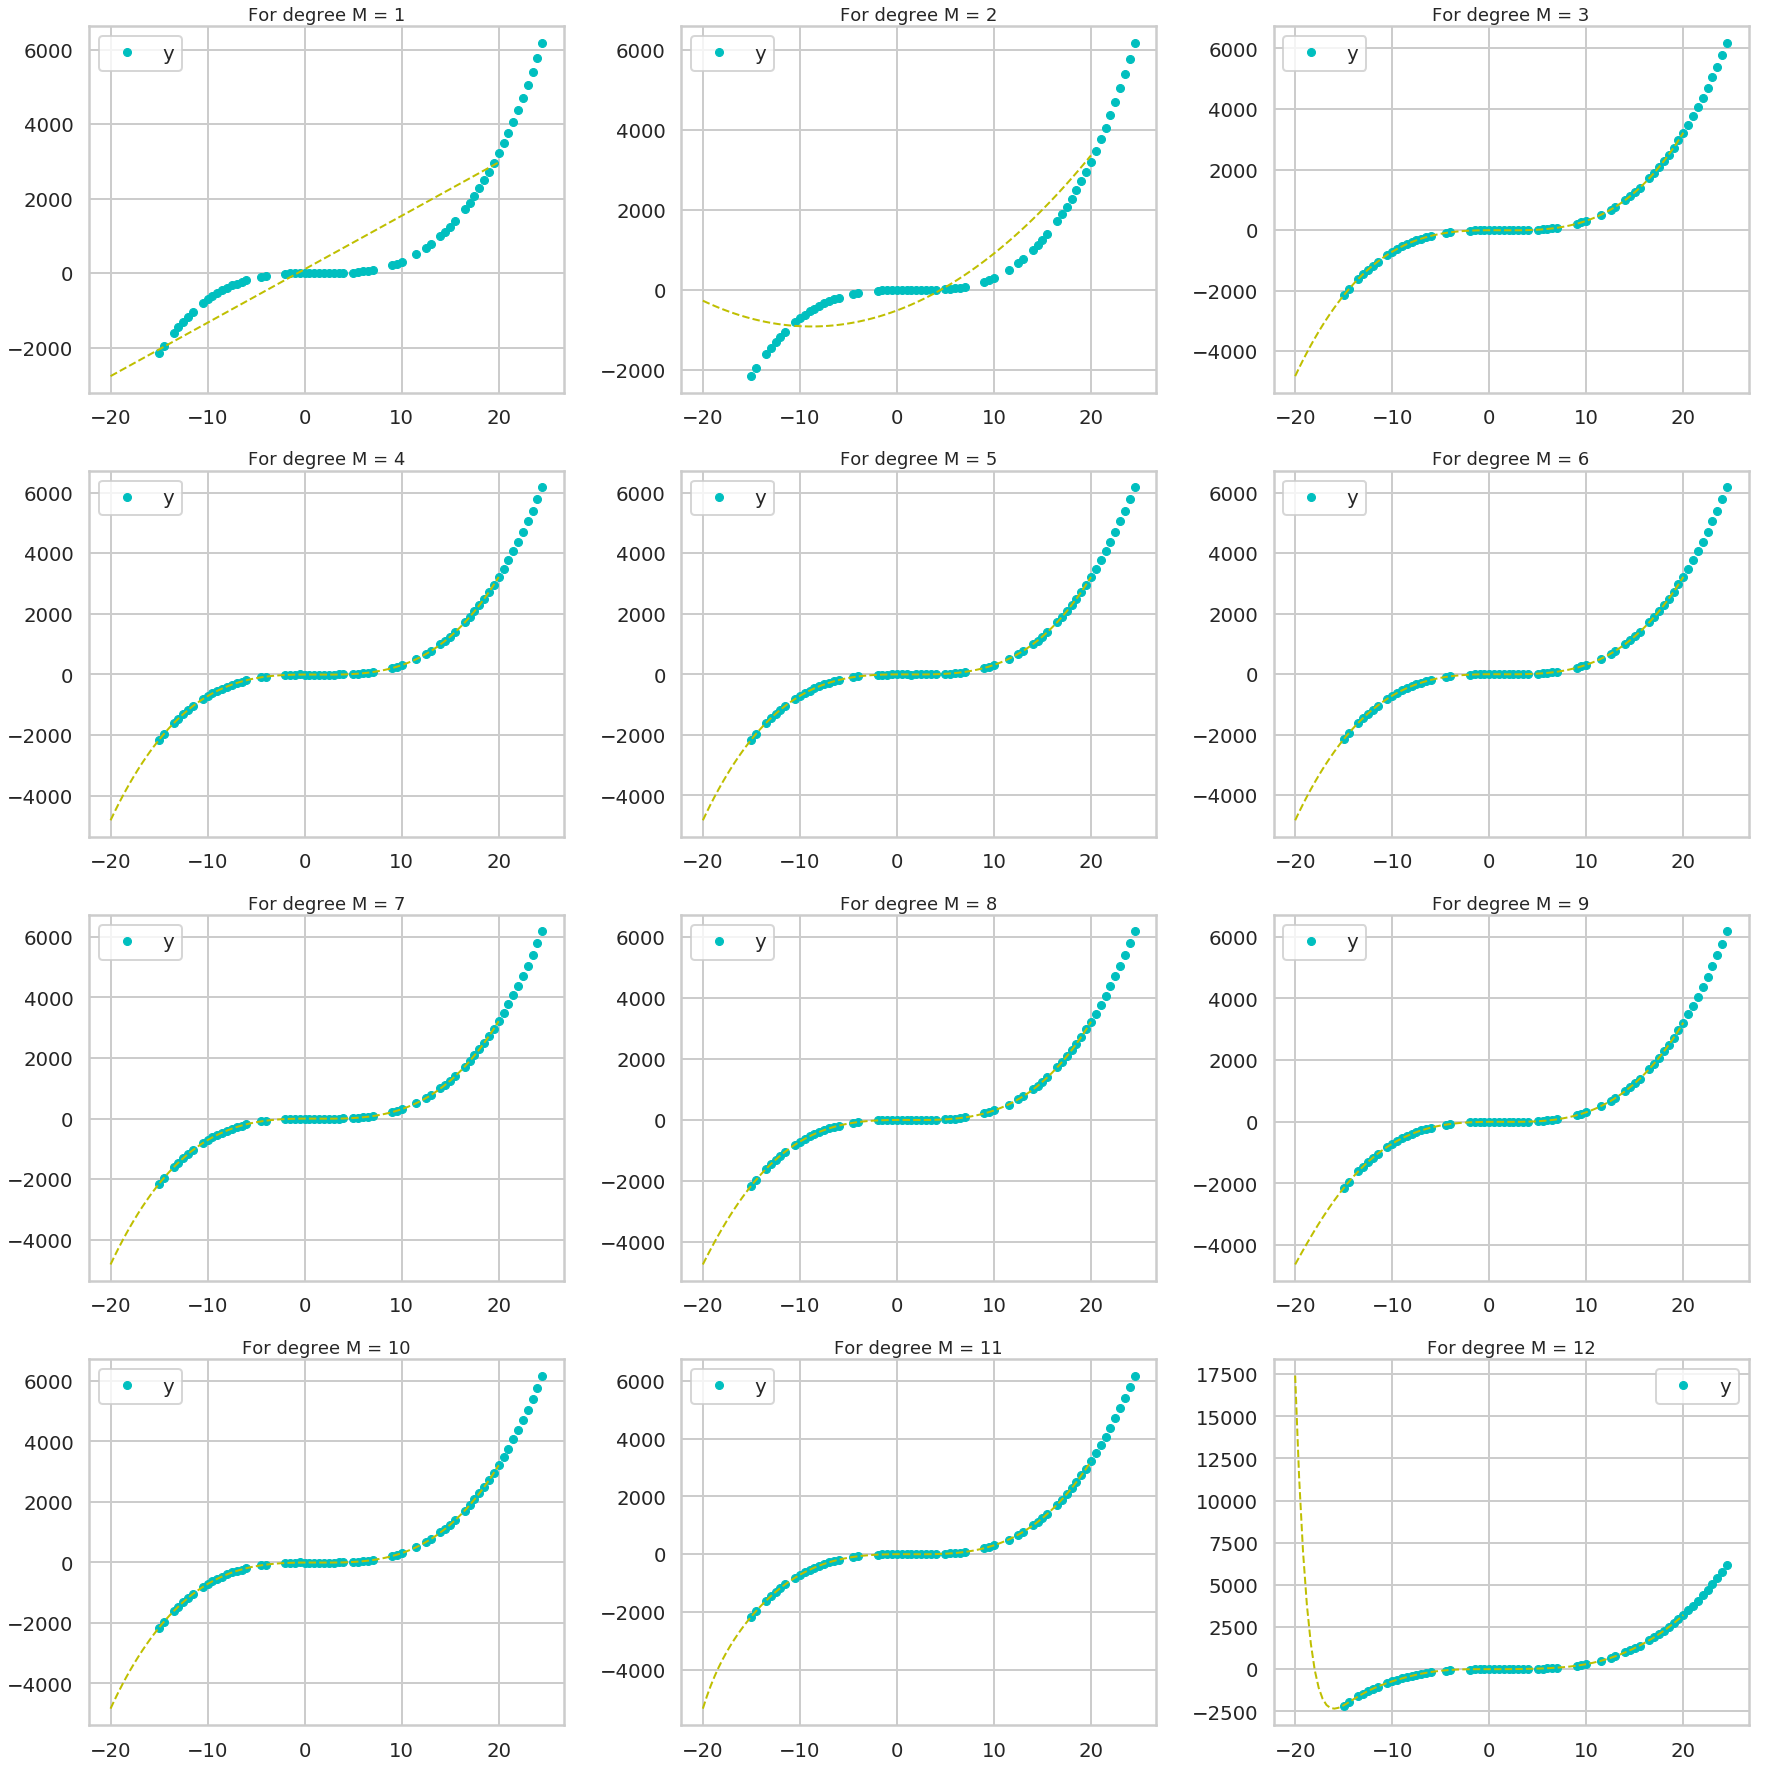

In [0]:
plt.clf()
plt.figure(figsize = (25,25))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-20,20,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(temp_data.x1, temp_data.y, 'co', markersize = 8) 
    plt.plot(x_fit, y_fit, 'y--', lw = 2)     
    plt.title('For degree M = %d'%(M), fontsize = 18)

    plt.legend()
    plt.tight_layout()

## Addidng 12 powers to Validation data set

In [0]:
temp_valid=validate_data.copy()

M = 12
for p in range(1,M+1): 
    temp_valid['x%d'%p]=temp_valid.x**p
temp_valid.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
24,-3.0,-35.624306,-3.0,9.0,-27.0,81.0,-243.0,729.0,-2187.0,6.561000e+03,-1.968300e+04,5.904900e+04,-1.771470e+05,5.314410e+05
46,8.0,132.927022,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,1.677722e+07,1.342177e+08,1.073742e+09,8.589935e+09,6.871948e+10
8,-11.0,-917.935911,-11.0,121.0,-1331.0,14641.0,-161051.0,1771561.0,-19487171.0,2.143589e+08,-2.357948e+09,2.593742e+10,-2.853117e+11,3.138428e+12
54,12.0,582.166661,12.0,144.0,1728.0,20736.0,248832.0,2985984.0,35831808.0,4.299817e+08,5.159780e+09,6.191736e+10,7.430084e+11,8.916100e+12
2,-14.0,-1778.151738,-14.0,196.0,-2744.0,38416.0,-537824.0,7529536.0,-105413504.0,1.475789e+09,-2.066105e+10,2.892547e+11,-4.049565e+12,5.669391e+13


## Fitting the validation data set to the model

In [0]:
temp_valid['ypred']=lm.predict(temp_valid)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.151e+05
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.25e-119
Time:                        18:16:04   Log-Likelihood:                -239.63
No. Observations:                  64   AIC:                             499.3
Df Residuals:                      54   BIC:                             520.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005   2.86e-05     16.382      0.0

## Plotting the visualization for each power

<Figure size 432x288 with 0 Axes>

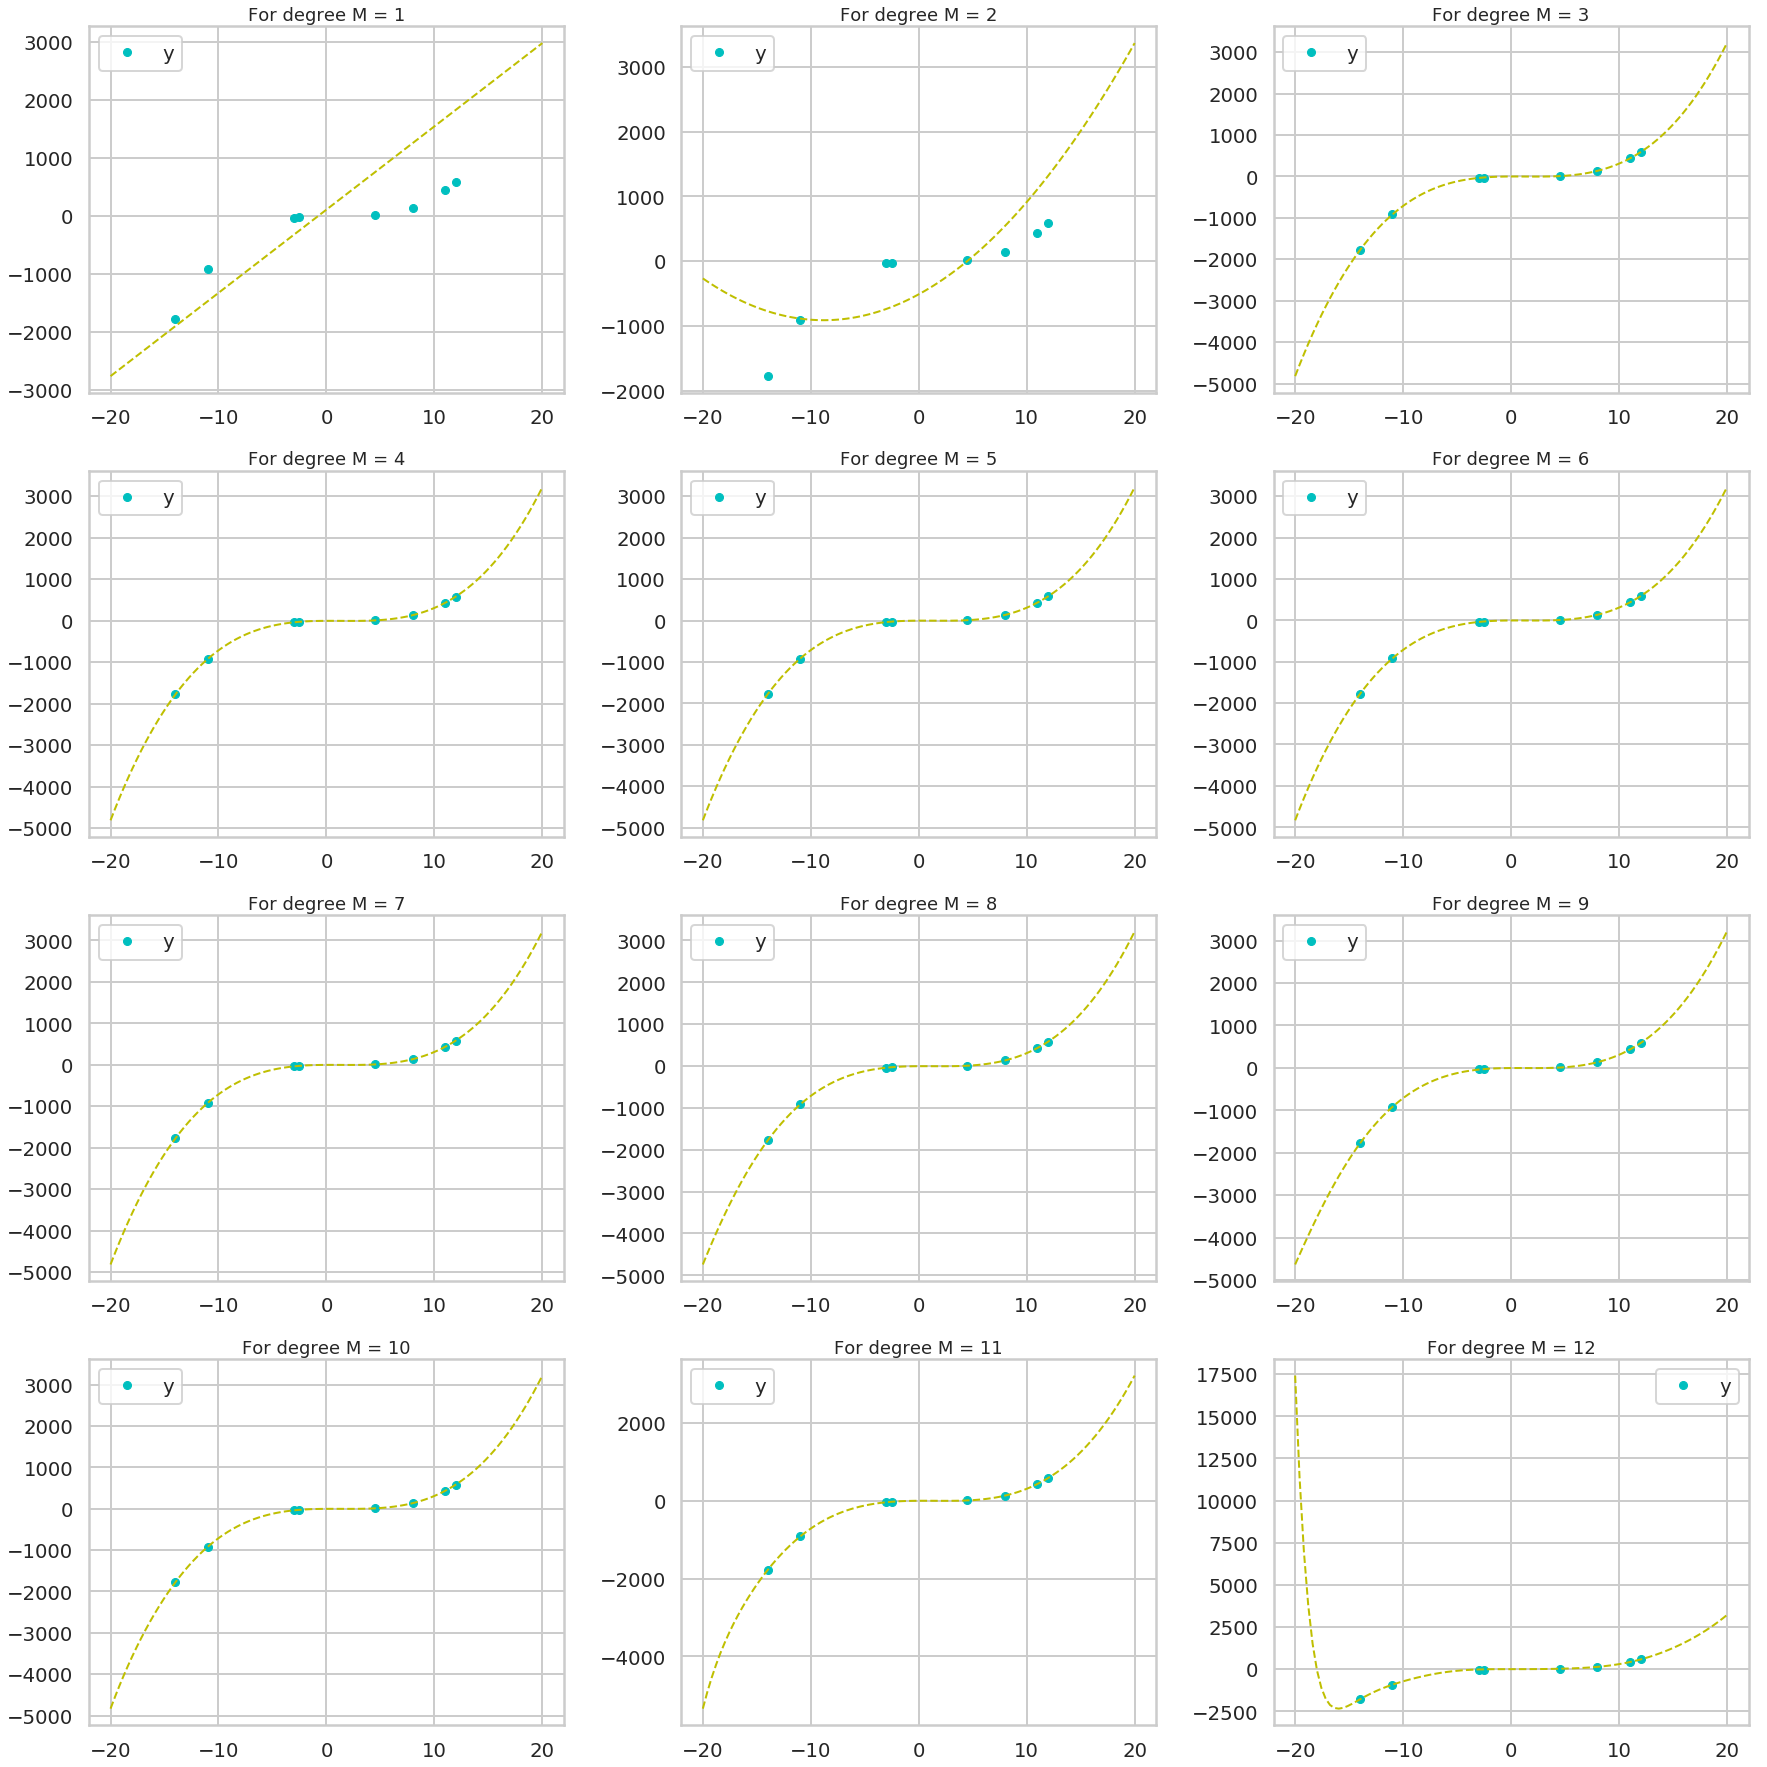

In [0]:
plt.clf()
plt.figure(figsize = (25,25))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-20,20,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(temp_valid.x1, temp_valid.y, 'co', markersize = 8) 
    plt.plot(x_fit, y_fit, 'y--', lw = 2)     
    plt.title('For degree M = %d'%(M), fontsize = 18)

    plt.legend()
    plt.tight_layout()

### Task 8:Compute R2 over the validation data

In [0]:
print("R2_Score for Validation Data: {}".format(r2_score(temp_valid.y, temp_valid.ypred)))

R2_Score for Validation Data: 0.9996823645109729


### Task 9: Did you get an optimal value with M=12?

# Although we do get a "kind-of" optimal value, however, it must be disregarded completely as the fit that results for power M = 12 is a clear cut case of overfitting. As the power of x keeps increasing in powers, the line fit keeps adjusting itself causing more and more deepened concept of overfitting on the data set

### Task 10:Generate regressors in the test sample and compute the model prediction

## Adding 12 regressors in the test sample!

In [0]:
temp_test = test_data.copy()

M = 12
for p in range(1,M+1): 
    temp_test['x%d'%p] = temp_test.x**p
temp_test.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
51,10.5,366.764155,10.5,110.25,1157.625,12155.0625,1.276282e+05,1.340096e+06,1.407100e+07,1.477455e+08,1.551328e+09,1.628895e+10,1.710339e+11,1.795856e+12
23,-3.5,-59.107709,-3.5,12.25,-42.875,150.0625,-5.252188e+02,1.838266e+03,-6.433930e+03,2.251875e+04,-7.881564e+04,2.758547e+05,-9.654916e+05,3.379221e+06
62,16.0,1547.609212,16.0,256.00,4096.000,65536.0000,1.048576e+06,1.677722e+07,2.684355e+08,4.294967e+09,6.871948e+10,1.099512e+12,1.759219e+13,2.814750e+14
57,13.5,877.324955,13.5,182.25,2460.375,33215.0625,4.484033e+05,6.053445e+06,8.172151e+07,1.103240e+09,1.489375e+10,2.010656e+11,2.714385e+12,3.664420e+13
20,-5.0,-121.561982,-5.0,25.00,-125.000,625.0000,-3.125000e+03,1.562500e+04,-7.812500e+04,3.906250e+05,-1.953125e+06,9.765625e+06,-4.882812e+07,2.441406e+08


## Computing the model prediction for Test Data

In [0]:
temp_test['pred'] = lm.predict(temp_test)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.151e+05
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.25e-119
Time:                        18:16:09   Log-Likelihood:                -239.63
No. Observations:                  64   AIC:                             499.3
Df Residuals:                      54   BIC:                             520.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005   2.86e-05     16.382      0.0

### Task 11:Visulaize results of Task 10.

<Figure size 432x288 with 0 Axes>

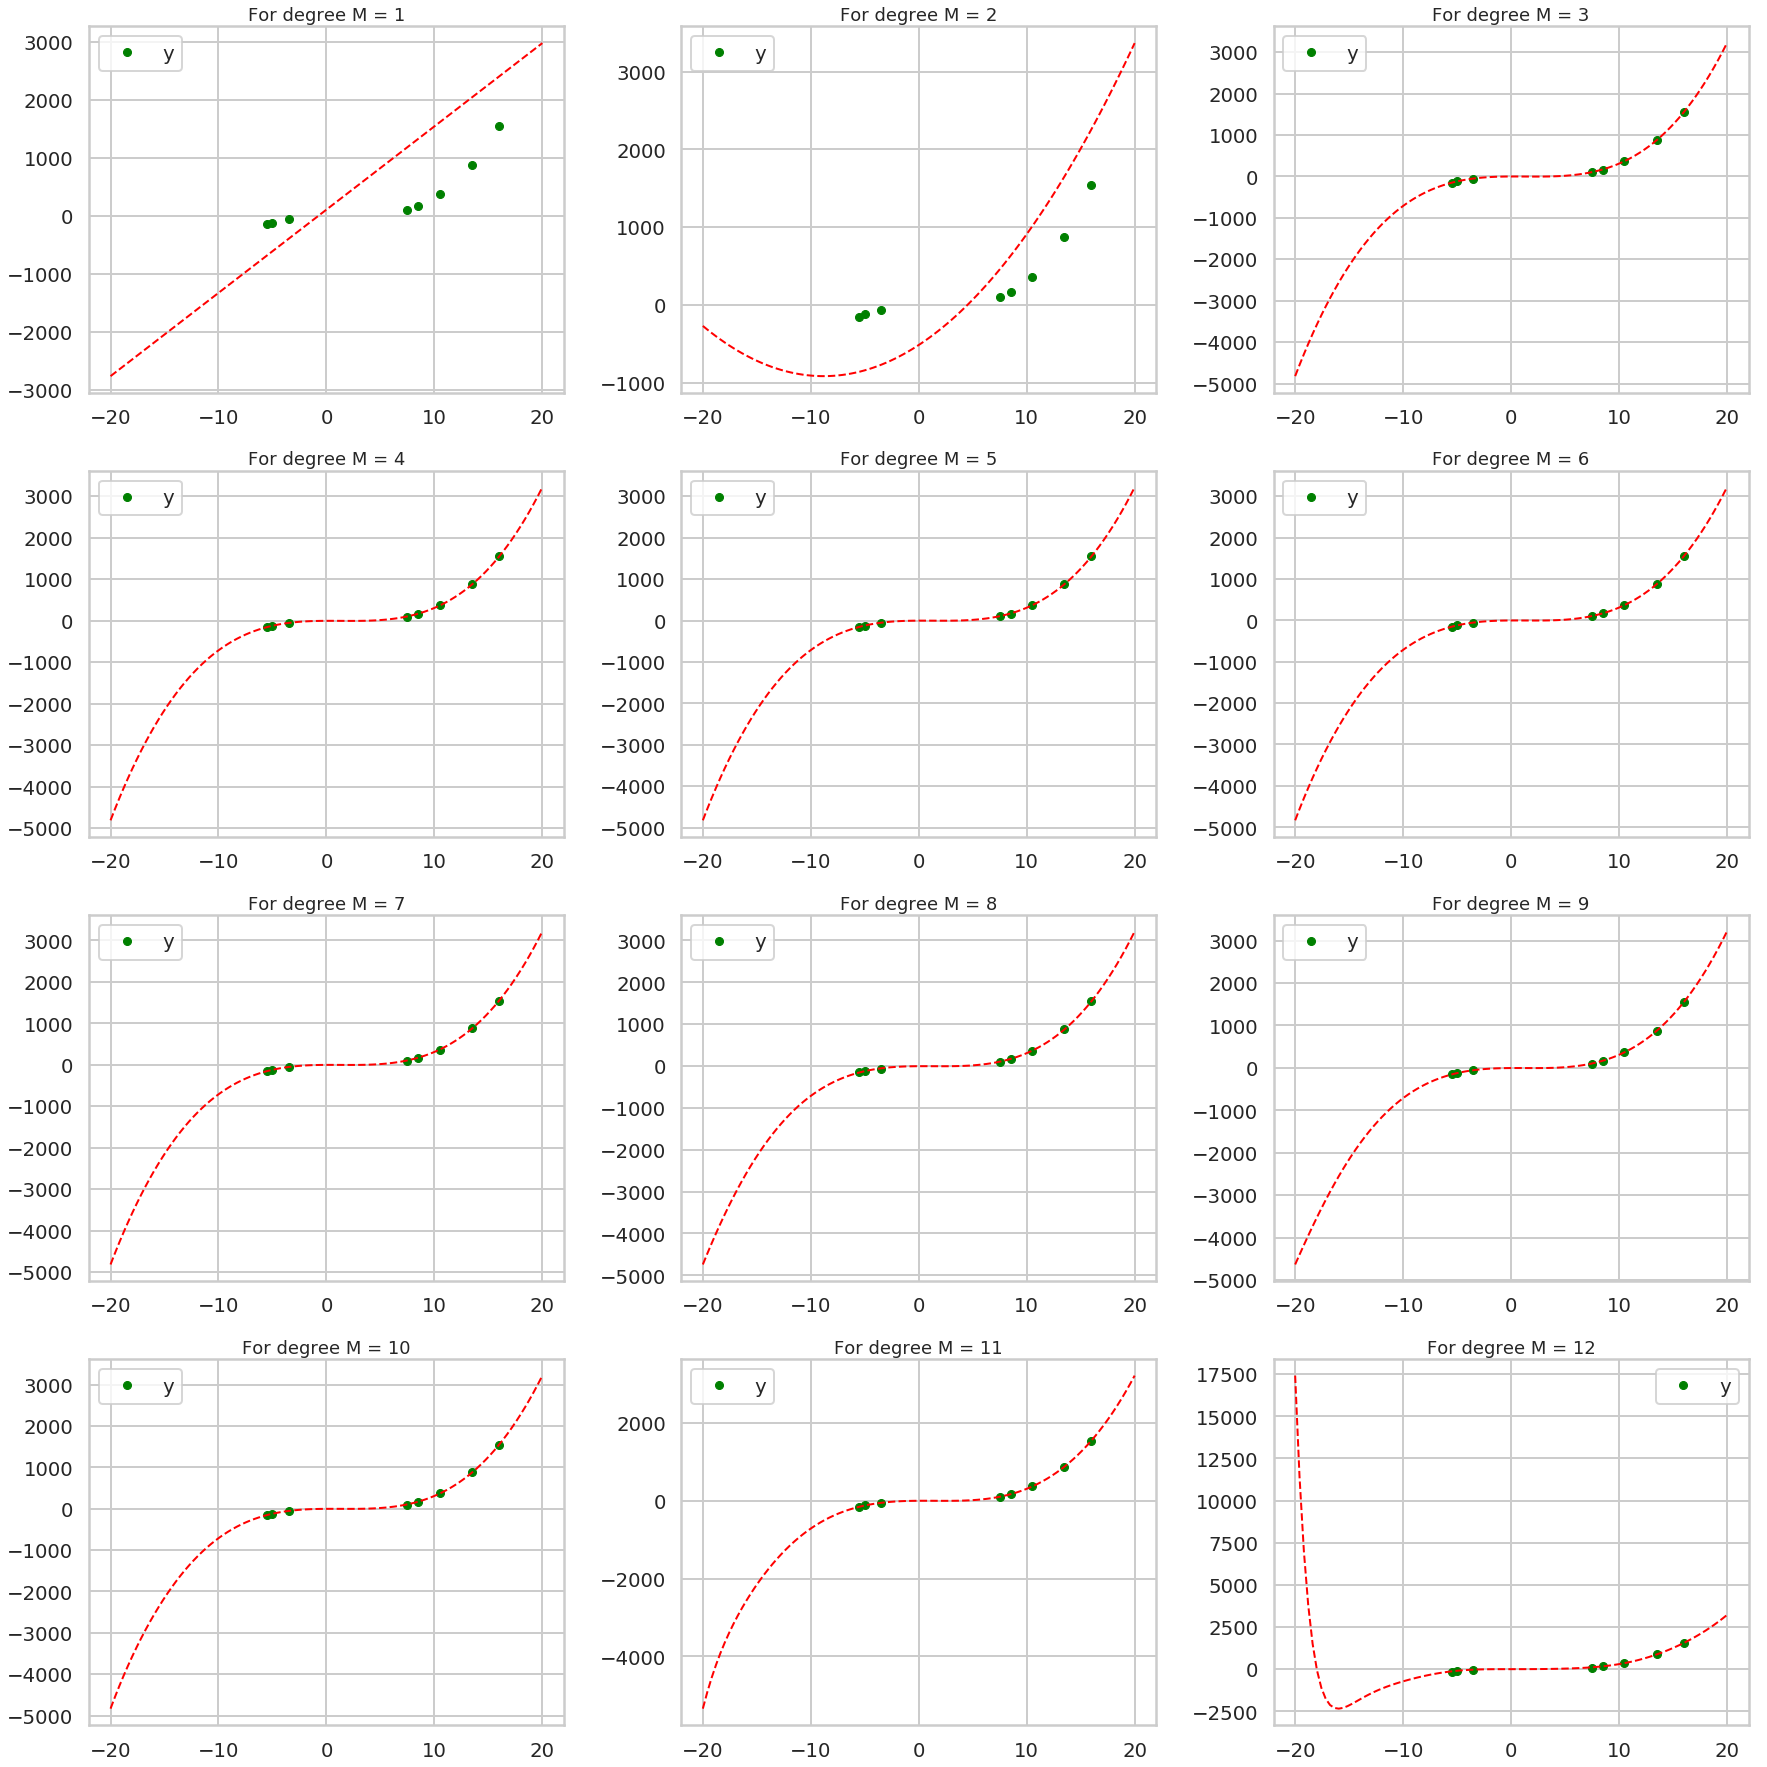

In [0]:
plt.clf()
plt.figure(figsize = (25,25))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-20,20,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(temp_test.x1, temp_test.y, 'go', markersize = 8) 
    plt.plot(x_fit, y_fit, 'r--', lw = 2)     
    plt.title('For degree M = %d'%(M), fontsize = 18)

    plt.legend()
    plt.tight_layout()

## R2 over Test Data

In [0]:
print("R2_Score for Test Data: {}".format(r2_score(temp_test.y, temp_test.pred)))

R2_Score for Test Data: 0.9990427632416112


## Problem 2:Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression on Advanced vs Other, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.Your regression model will be between predicted and observed income.

In [0]:
income = pd.read_csv('/content/drive/My Drive/education.csv')
income.drop(columns = 'Unnamed: 0', inplace = True)
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [0]:
income.dropna(inplace = True)

In [0]:
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [0]:
income['Advanced'] = income['Master']+income['Doctorate']+income['ProfSchool']
income['Other'] = income['LessThanHS']+income['HighSchool']+income['SomeCollege']

In [0]:
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922,0.314674,0.314123
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857,0.095040,0.696186
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335,0.349643,0.214293
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432,0.383502,0.184730
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354,0.423077,0.115888


In [0]:
lm3 = smf.ols(formula = 'IncomePerCapita ~ Advanced', data = income).fit()
income['Aprediction'] = lm3.predict()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     891.0
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.06e-71
Time:                        18:16:14   Log-Likelihood:                -1959.5
No. Observations:                 181   AIC:                             3923.
Df Residuals:                     179   BIC:                             3929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1857.3273   1539.833      1.206      0.2

In [0]:
lm3 = smf.ols(formula = 'IncomePerCapita ~ Other', data = income).fit()
income['Oprediction'] = lm3.predict()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     901.5
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           8.60e-72
Time:                        18:16:14   Log-Likelihood:                -1958.6
No. Observations:                 181   AIC:                             3921.
Df Residuals:                     179   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.173e+05   2762.512     42.463      0.0

In [0]:
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other,Aprediction,Oprediction
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922,0.314674,0.314123,74601.756155,77522.730284
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857,0.095040,0.696186,23828.172362,29136.655966
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335,0.349643,0.214293,82685.642735,90165.667329
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432,0.383502,0.184730,90512.838359,93909.588951
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354,0.423077,0.115888,99661.631419,102627.990293


### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

## Visualization between Advanced and Income Per Capita

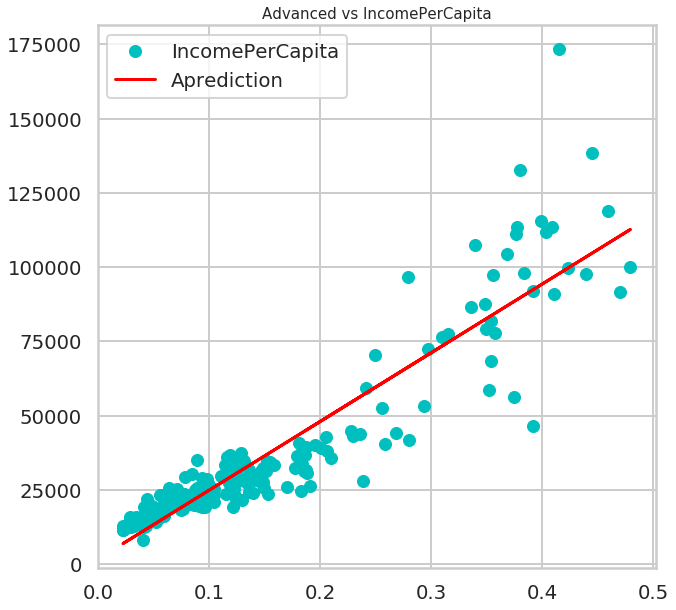

In [0]:
plt.figure(figsize=(10,10))
plt.plot(income.Advanced, income.IncomePerCapita, 'co')
plt.title('Advanced vs IncomePerCapita', fontsize = 15)
plt.plot(income.Advanced, income.Aprediction, 'r-')
plt.legend()

## Visualization between Others and Income Per Capita

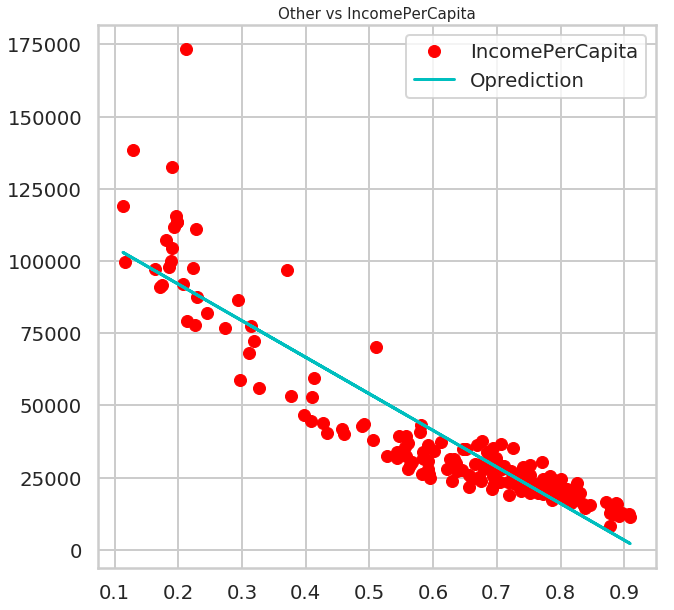

In [0]:
plt.figure(figsize=(10,10))
plt.plot(income.Other, income.IncomePerCapita, 'ro')
plt.title('Other vs IncomePerCapita', fontsize = 15)
plt.plot(income.Other, income.Oprediction, 'c-')
plt.legend()

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [0]:
msa = pd.read_csv('/content/drive/My Drive/Untitled folder/msalist.csv', encoding = 'unicode_escape')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


In [0]:
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [0]:
demographics = pd.read_csv('/content/drive/My Drive/Untitled folder/demographics.csv', encoding = 'unicode_escape')
demographics.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,SE_T003_002,SE_T003_003,SE_T057_001,SE_T083_001
0,1001,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55136,55136,92.75346,594.436089,604.3882,594.4361,9.952067,52475,24644
1,1003,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191205,191205,120.27100,1589.784070,2027.3110,1589.7840,437.527200,50183,26851
2,1005,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",al,50,0,ACSSF,15,NaN,NaN,NaN,NaN,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27119,27119,30.64722,884.876304,904.5153,884.8763,19.638980,35634,17350
3,1007,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,NaN,NaN,NaN,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22653,22653,36.38555,622.582332,626.1689,622.5823,3.586525,37984,18110
4,1009,05000US01009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,NaN,NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57645,57645,89.40315,644.775905,650.6282,644.7759,5.852321,44409,20501


In [0]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [0]:
demographics['Income']=demographics.Population*demographics['Per capita income']

In [0]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [0]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]

In [0]:
crime2014 = pd.read_csv('/content/drive/My Drive/Untitled folder/R11460954_SL050.csv') 

In [0]:
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

In [0]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [0]:
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [0]:
msaCrime = (msaCrime.where(msaCrime.Crimes>0))

In [0]:
msaCrime.sort_values(by = 'Crimes', ascending = True)

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
11020,125955.0,1.0,1.0,0.0
21500,278443.0,2.0,0.0,2.0
36140,95344.0,3.0,2.0,1.0
10900,407571.0,3.0,0.0,3.0
49620,440755.0,5.0,5.0,0.0
39740,413691.0,5.0,5.0,0.0
14460,300621.0,9.0,5.0,4.0
38300,2154097.0,17.0,12.0,5.0
38540,83347.0,65.0,7.0,58.0


# Note to Intructor: ** I HAVE REMOVED NaNs from the above table!**

In [0]:
msaCrime.dropna(inplace = True, how = 'any')

In [0]:
msaCrime.rename(columns={'Violent Crimes':'Violent', 'Property Crimes':'Property'}, inplace = True)

In [0]:
population_log = np.log(msaCrime['Population'])
crimes_log = np.log(msaCrime['Crimes'])
violent_log = np.log(msaCrime['Violent'])
property_log = np.log(msaCrime['Property'])

final_data = pd.DataFrame(data=[crimes_log, population_log, violent_log, property_log]).T
final_data.sort_values(by='Crimes', ascending=False, inplace=True) 
final_data.head()

,Crimes,Population,Violent,Property
msa,,,,
26420,11.198352,15.685801,9.287764,11.038191
33100,11.025784,15.595504,9.090768,10.869806
36740,10.683661,14.657689,8.882114,10.503285
45300,10.571035,14.885580,8.373323,10.453313
24860,10.098890,13.667548,8.106515,9.952278


## Regression 1, Crime vs Population

In [0]:
cpr = smf.ols(formula = 'Crimes~Population', data = final_data).fit()
print(cpr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Crimes   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.29e-33
Time:                        18:16:16   Log-Likelihood:                -542.10
No. Observations:                 337   AIC:                             1088.
Df Residuals:                     335   BIC:                             1096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1676      0.768     -4.127      0.0

$$log(Crime)= 0.8218 log(Population) -3.1676$$ 


In [0]:
cpr.conf_int(alpha=0.05)

,0,1
Intercept,-4.677330,-1.657776
Population,0.701814,0.941740


In [0]:
cpr.conf_int(alpha=0.01)

,0,1
Intercept,-5.155893,-1.179213
Population,0.663789,0.979765


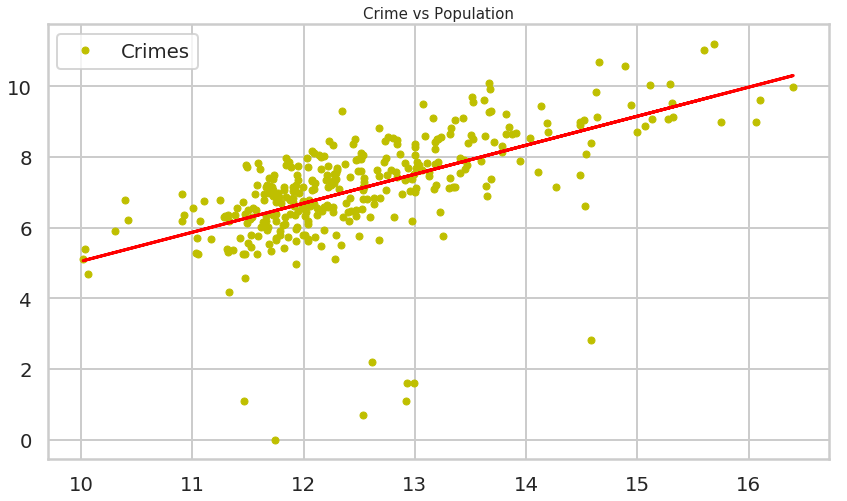

In [0]:
plt.figure(figsize=(14,8))
plt.plot(final_data.Population, final_data.Crimes, 'yo', markersize = 7)
plt.title('Crime vs Population', fontsize = 15)
ax.set(xlabel='Population', ylabel='Crimes')
plt.plot(final_data['Population'], cpr.predict(), '-r')
plt.legend()

## Regression 2, Violent Crime vs Population

In [0]:
final_data1 = final_data.copy()
final_data1.drop(['Crimes', 'Property'], axis = 1, inplace = True)
final_data1 = final_data1.where(final_data1['Violent']>0)
final_data1.sort_values(by='Violent', ascending = True)

In [0]:
final_data1.dropna(inplace = True, how = 'any')

In [0]:
vp = smf.ols(formula = 'Violent~Population', data = final_data1).fit()
print(vp.summary())

                            OLS Regression Results                            
Dep. Variable:                Violent   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     299.6
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.71e-48
Time:                        18:16:16   Log-Likelihood:                -480.95
No. Observations:                 334   AIC:                             965.9
Df Residuals:                     332   BIC:                             973.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2219      0.649     -9.585      0.0

$$log(Violent Crime)= 0.8927 log(Population) - 6.2219$$ 


In [0]:
vp.conf_int(alpha=0.05)

,0,1
Intercept,-7.498885,-4.944936
Population,0.791286,0.994191


In [0]:
vp.conf_int(alpha=0.01)

,0,1
Intercept,-7.903687,-4.540134
Population,0.759126,1.026351


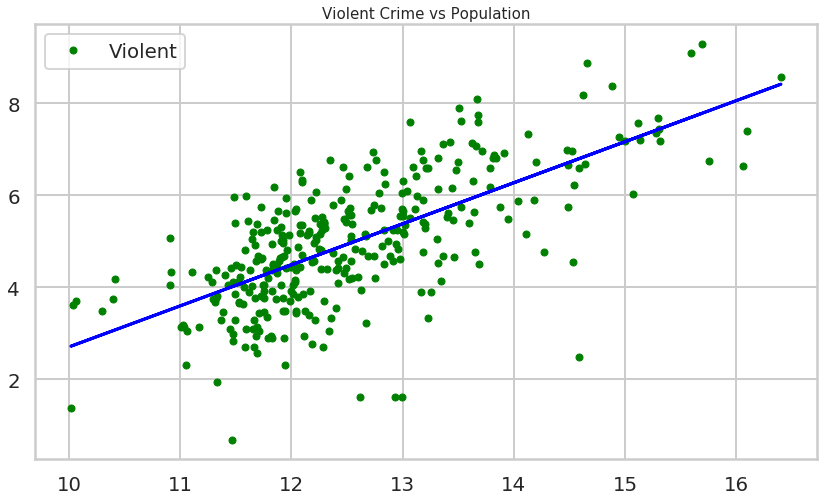

In [0]:
plt.figure(figsize=(14,8))
plt.plot(final_data1.Population, final_data1.Violent, 'go', markersize = 7)
plt.title('Violent Crime vs Population', fontsize = 15)
plt.plot(final_data1['Population'], vp.predict(), '-b')
ax.set(xlabel='Population', ylabel='Violent Crimes')
plt.legend()

## Regression 3, Property Crime vs Population

In [0]:
final_data2 = final_data.copy()
final_data2.drop(['Crimes', 'Violent'], axis = 1, inplace = True)
final_data2 = final_data2.where(final_data2['Property']>0)
final_data2.sort_values(by='Property', ascending = True)
final_data2.dropna(inplace = True, how = 'any')

In [0]:
pcpr = smf.ols(formula = 'Property~Population', data = final_data2).fit()
print(pcpr.summary())

                            OLS Regression Results                            
Dep. Variable:               Property   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     220.2
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           1.53e-38
Time:                        18:16:17   Log-Likelihood:                -491.98
No. Observations:                 333   AIC:                             988.0
Df Residuals:                     331   BIC:                             995.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9051      0.675     -4.302      0.0

$$log(PropertyCrime) = 0.7959log(Population) - 2.9051$$

In [0]:
pcpr.conf_int(alpha=0.05)

,0,1
Intercept,-4.233342,-1.576843
Population,0.690399,0.901421


In [0]:
pcpr.conf_int(alpha=0.01)

,0,1
Intercept,-4.654410,-1.155775
Population,0.656951,0.934870


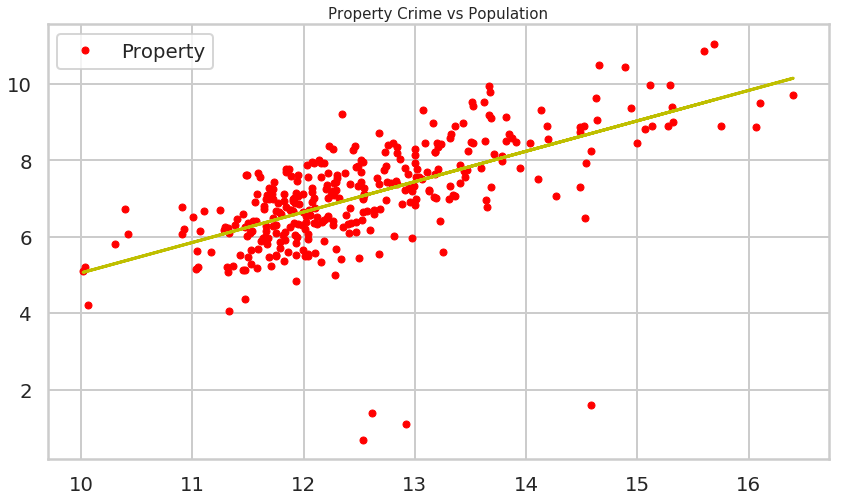

In [0]:
plt.figure(figsize=(14,8))
plt.plot(final_data2.Population, final_data2.Property, 'ro', markersize = 7)
plt.title('Property Crime vs Population', fontsize = 15)
ax.set(xlabel='Population', ylabel='Property Crime')
plt.plot(final_data2['Population'], pcpr.predict(), '-y')
plt.legend()

### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [0]:
final_data['msaName']=final_data.index.map(msaNames)
final_data['Residual - Crime']=cpr.predict()-final_data['Crimes']

In [0]:
print("Top 5 cities by crime log-residual")
print(final_data.sort_values(by='Residual - Crime',ascending=False).head(5))
print("\n\nLast 5 cities by crime log-residual")
print(final_data.sort_values(by='Residual - Crime',ascending=True).head(5))

Top 5 cities by crime log-residual
         Crimes  ...  Residual - Crime
msa              ...                  
11020  0.000000  ...          6.483133
21500  0.693147  ...          6.441892
10900  1.098612  ...          6.349525
38300  2.833213  ...          5.983110
49620  1.609438  ...          5.903023

[5 rows x 6 columns]


Last 5 cities by crime log-residual
          Crimes  ...  Residual - Crime
msa               ...                  
31420   9.294773  ...         -2.315198
24860  10.098890  ...         -2.034767
37860   9.490545  ...         -1.918185
35380   9.919656  ...         -1.850721
36740  10.683661  ...         -1.805863

[5 rows x 6 columns]


### Task 3:Is there any correlation between residual by income and residual by crime?

In [0]:
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


In [0]:
final_data.head()

,Crimes,Population,Violent,Property,msaName,Residual - Crime
msa,,,,,,
26420,11.198352,15.685801,9.287764,11.038191,"Houston-The Woodlands-Sugar Land, TX (Metropol...",-1.475675
33100,11.025784,15.595504,9.090768,10.869806,"Miami-Fort Lauderdale-West Palm Beach, FL (Met...",-1.377311
36740,10.683661,14.657689,8.882114,10.503285,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",-1.805863
45300,10.571035,14.885580,8.373323,10.453313,"Tampa-St. Petersburg-Clearwater, FL (Metropoli...",-1.505961
24860,10.098890,13.667548,8.106515,9.952278,"Greenville-Anderson-Mauldin, SC (Metropolitan ...",-2.034767


In [0]:
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


In [0]:
nd = pd.DataFrame(data = [np.log(msaDemo.Income), np.log(msaDemo.Population)]).T
nd.sort_values(by = 'Income', ascending= False, inplace = True)

In [0]:
nd.head()

,Income,Population
msa,,
35620,27.297920,16.804472
31080,26.677462,16.385106
16980,26.425884,16.068532
19100,26.019203,15.718069
37980,26.009518,15.609823


In [0]:
mf = smf.ols(formula = 'Income~Population', data = nd).fit()
mf_predict = mf.predict()
msaDemo['Residual - Income'] = mf_predict-nd.Income
msaDemo.head()

,Population,Area,Income,Residual - Income
msa,,,,
10180,167171,2743.478027,3740034900,0.101101
10420,703017,900.129156,19560044574,-0.025948
10500,156706,1932.557130,3172077530,0.197068
10540,118270,2290.129282,2526602010,0.125354
10580,875567,2811.554500,28078339939,-0.154064


In [0]:
temp_holder = msaDemo['Residual - Income']
final_data['Residual - Income'] = final_data.index.map(temp_holder)
final_data.corr()

,Crimes,Population,Violent,Property,Residual - Crime,Residual - Income
Crimes,1.000000,5.928717e-01,0.922084,0.997116,-8.052969e-01,0.158061
Population,0.592872,1.000000e+00,0.683321,0.622011,6.019437e-16,0.013658
Violent,0.922084,6.833212e-01,1.000000,0.898981,-6.369554e-01,0.145566
Property,0.997116,6.220113e-01,0.898981,1.000000,-7.794305e-01,0.163469
Residual - Crime,-0.805297,6.019437e-16,-0.636955,-0.779430,1.000000e+00,-0.186222
Residual - Income,0.158061,1.365834e-02,0.145566,0.163469,-1.862217e-01,1.000000


## Correlation between Residual - Crime and Residual Income is -0.186222. There exists an inverse relationship between Crime and Income, as one increases the other keeps decreases.